#Setup

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
#Change your directory here
WorkDir = "/content/drive/MyDrive/tensorflow_project/Satellite Image Analysis/"

In [3]:
import os
os.chdir(WorkDir)

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import keras.backend as K
from datetime import date
from datetime import datetime
from tqdm import tqdm
import xarray
import cv2

#Load Data

In [5]:
dataset = pd.read_pickle('data/merged/thai_resized_noNaN_X-normed_Y-normed.pkl')
dataset.head()

,DATASET,DATE,TIME,LAT,LON,B01,B02,B03,B04,B05,...,B8A,B09,B11,B12,TEMP,DO,PH,COND,station,subset
0,Thai-autostation-dataset,2019-01-02,00:00,13.675829,100.25671,"[[0.015848434, 0.015848434, 0.015848434, 0.008...","[[0.027893856, 0.028729629, 0.012536565, 0.011...","[[0.03893538, 0.037424453, 0.016794514, 0.0148...","[[0.11132825, 0.100737564, 0.013364433, 0.0134...","[[0.09518593, 0.05459193, 0.05459193, 0.011867...",...,"[[0.14797762, 0.06559467, 0.06559467, 0.009704...","[[0.09483302, 0.09483302, 0.09483302, 0.025099...","[[0.23168565, 0.14902289, 0.14902289, 0.017556...","[[0.19403368, 0.10667578, 0.10667578, 0.019146...",0.605714,0.01,0.378571,0.421800,0,2
1,Thai-autostation-dataset,2019-01-02,00:30,13.675829,100.25671,"[[0.015848434, 0.015848434, 0.015848434, 0.008...","[[0.027893856, 0.028729629, 0.012536565, 0.011...","[[0.03893538, 0.037424453, 0.016794514, 0.0148...","[[0.11132825, 0.100737564, 0.013364433, 0.0134...","[[0.09518593, 0.05459193, 0.05459193, 0.011867...",...,"[[0.14797762, 0.06559467, 0.06559467, 0.009704...","[[0.09483302, 0.09483302, 0.09483302, 0.025099...","[[0.23168565, 0.14902289, 0.14902289, 0.017556...","[[0.19403368, 0.10667578, 0.10667578, 0.019146...",0.605714,0.01,0.378571,0.422067,0,2
2,Thai-autostation-dataset,2019-01-02,01:00,13.675829,100.25671,"[[0.015848434, 0.015848434, 0.015848434, 0.008...","[[0.027893856, 0.028729629, 0.012536565, 0.011...","[[0.03893538, 0.037424453, 0.016794514, 0.0148...","[[0.11132825, 0.100737564, 0.013364433, 0.0134...","[[0.09518593, 0.05459193, 0.05459193, 0.011867...",...,"[[0.14797762, 0.06559467, 0.06559467, 0.009704...","[[0.09483302, 0.09483302, 0.09483302, 0.025099...","[[0.23168565, 0.14902289, 0.14902289, 0.017556...","[[0.19403368, 0.10667578, 0.10667578, 0.019146...",0.605714,0.01,0.378571,0.423400,0,2
3,Thai-autostation-dataset,2019-01-02,01:30,13.675829,100.25671,"[[0.015848434, 0.015848434, 0.015848434, 0.008...","[[0.027893856, 0.028729629, 0.012536565, 0.011...","[[0.03893538, 0.037424453, 0.016794514, 0.0148...","[[0.11132825, 0.100737564, 0.013364433, 0.0134...","[[0.09518593, 0.05459193, 0.05459193, 0.011867...",...,"[[0.14797762, 0.06559467, 0.06559467, 0.009704...","[[0.09483302, 0.09483302, 0.09483302, 0.025099...","[[0.23168565, 0.14902289, 0.14902289, 0.017556...","[[0.19403368, 0.10667578, 0.10667578, 0.019146...",0.602857,0.01,0.378571,0.423600,0,2
4,Thai-autostation-dataset,2019-01-02,02:00,13.675829,100.25671,"[[0.015848434, 0.015848434, 0.015848434, 0.008...","[[0.027893856, 0.028729629, 0.012536565, 0.011...","[[0.03893538, 0.037424453, 0.016794514, 0.0148...","[[0.11132825, 0.100737564, 0.013364433, 0.0134...","[[0.09518593, 0.05459193, 0.05459193, 0.011867...",...,"[[0.14797762, 0.06559467, 0.06559467, 0.009704...","[[0.09483302, 0.09483302, 0.09483302, 0.025099...","[[0.23168565, 0.14902289, 0.14902289, 0.017556...","[[0.19403368, 0.10667578, 0.10667578, 0.019146...",0.602857,0.01,0.385714,0.423267,0,2


In [6]:
dataset.groupby('subset')['subset'].count()

subset
0    88554
1    16388
2    16347
Name: subset, dtype: int64

#Machine Learning

##Bayesian NN

In [7]:
pip install tensorflow-probability

In [8]:
import tensorflow_probability as tfp

In [23]:
Band = ["B01", "B02", "B03", "B04", "B05", "B06", "B07", "B08", "B8A", "B09", "B11", "B12"]

feature_to_predict = ['DO']

In [24]:
def process_to_numpy(dataset, feature, subset):
    data = dataset[dataset.subset == subset][feature]
    data = np.array(data)
    data = np.array([[img for img in sample] for sample in data])

    return data

In [25]:
train_x = process_to_numpy(dataset, Band, 0)

train_y = process_to_numpy(dataset, feature_to_predict, 0)

test_x = process_to_numpy(dataset, Band, 1)

test_y = process_to_numpy(dataset, feature_to_predict, 1)

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((88554, 12, 12, 12), (88554, 1), (16388, 12, 12, 12), (16388, 1))

In [26]:
# Define the prior weight distribution as Normal of mean=0 and stddev=1.
# Note that, in this example, the we prior distribution is not trainable,
# as we fix its parameters.
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = tf.keras.Sequential(
        [
            tfp.layers.DistributionLambda(
                lambda t: tfp.distributions.MultivariateNormalDiag(
                    loc=tf.zeros(n), scale_diag=tf.ones(n)
                )
            )
        ]
    )
    return prior_model


# Define variational posterior weight distribution as multivariate Gaussian.
# Note that the learnable parameters for this distribution are the means,
# variances, and covariances.
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = tf.keras.Sequential(
        [
            tfp.layers.VariableLayer(
                tfp.layers.MultivariateNormalTriL.params_size(n), dtype=dtype
            ),
            tfp.layers.MultivariateNormalTriL(n),
        ]
    )
    return posterior_model

In [27]:
def cre_model(hidden_units):
    inputs = tf.keras.layers.Input(shape = (12, 12, 12))

    features = tf.keras.layers.Flatten()(inputs)

    features = tf.keras.layers.Dense(64, activation = 'relu')(features)

   # Create hidden layers with weight uncertainty using the DenseVariational layer.
    for units in hidden_units:
        features = tfp.layers.DenseVariational(
            units=units,
            make_prior_fn=prior,
            make_posterior_fn=posterior,
            kl_weight=1 / train_x.shape[0],
            activation="sigmoid",
        )(features)

    # The output is deterministic: a single point estimate.
    outputs = tf.keras.layers.Dense(units=1)(features)
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [28]:
def R2(yt, yp):
  # yt = tf.constant(yt)
  return 1 - K.sum(K.square(yt - yp))/K.sum(K.square(yt - K.mean(yt)))

In [31]:
hidden_units = [8]

model = cre_model(hidden_units)

model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
        loss='mse',
        metrics=['mae', tf.keras.metrics.RootMeanSquaredError(), R2],
    )

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 12, 12, 12)]      0         
                                                                 
 flatten_3 (Flatten)         (None, 1728)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                110656    
                                                                 
 dense_variational_3 (Dense  (None, 8)                 135980    
 Variational)                                                    
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 246645 (963.46 KB)
Trainable params: 246645 (963.46 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

(array([6.0610e+03, 1.4941e+04, 2.5084e+04, 1.9091e+04, 1.2799e+04,
        5.8210e+03, 2.0130e+03, 2.0110e+03, 7.2100e+02, 1.2000e+01]),
 array([0.005, 0.05 , 0.095, 0.14 , 0.185, 0.23 , 0.275, 0.32 , 0.365,
        0.41 , 0.455]),
 <BarContainer object of 10 artists>)

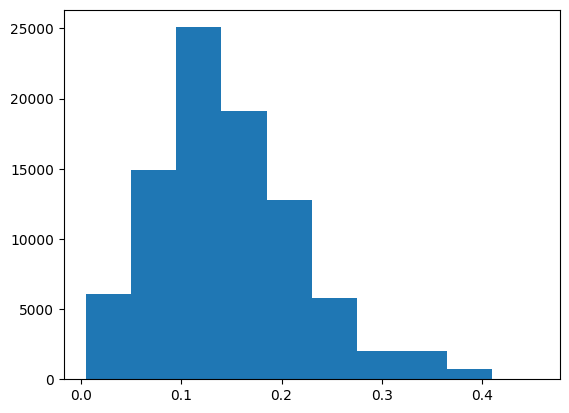

In [33]:
plt.hist(train_y)

In [34]:
print("Start training the model...")
model.fit(x = train_x, y = train_y, batch_size = 32, epochs=100, validation_data = (test_x, test_y))

print("Model training finished.")
_, rmse = model.evaluate(train_x, train_y, verbose=0)
print(f"Train RMSE: {round(rmse, 3)}")

print("Evaluating model performance...")
_, rmse = model.evaluate(test_x, test_y, verbose=0)
print(f"Test RMSE: {round(rmse, 3)}")

Start training the model...
Epoch 1/100
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0176 - mae: 0.0597 - root_mean_squared_error: 0.0767 - R2: -0.1948 - val_loss: 0.0201 - val_mae: 0.0771 - val_root_mean_squared_error: 0.0886 - val_R2: -inf
Epoch 2/100
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0177 - mae: 0.0601 - root_mean_squared_error: 0.0771 - R2: -0.2039 - val_loss: 0.0219 - val_mae: 0.0899 - val_root_mean_squared_error: 0.1021 - val_R2: -inf
Epoch 3/100
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0171 - mae: 0.0596 - root_mean_squared_error: 0.0765 - R2: -0.1888 - val_loss: 0.0173 - val_mae: 0.0663 - val_root_mean_squared_error: 0.0808 - val_R2: -inf
Epoch 4/100
2768/2768 [==============================] - 11s 4ms/step - loss: 0.0165 - mae: 0.0598 - root_mean_squared_error: 0.0768 - R2: -0.1947 - val_loss: 0.0167 - val_mae: 0.0656 - val_root_mean_squared_error: 0.0795 - val_R2: -inf
Epoch 5/100
2768/2768 [=

KeyboardInterrupt: ignored

In [35]:
# Make predictions on the test dataset
predicted_values = model.predict(test_x)

# Calculate the correlation matrix
import numpy as np
correlation_matrix = np.corrcoef(test_y, predicted_values, rowvar=False)

# Print or use the correlation matrix as needed
print("Correlation Matrix:")
print(correlation_matrix)

513/513 [==============================] - 1s 2ms/step
Correlation Matrix:
[[ 1.         -0.03060877]
 [-0.03060877  1.        ]]


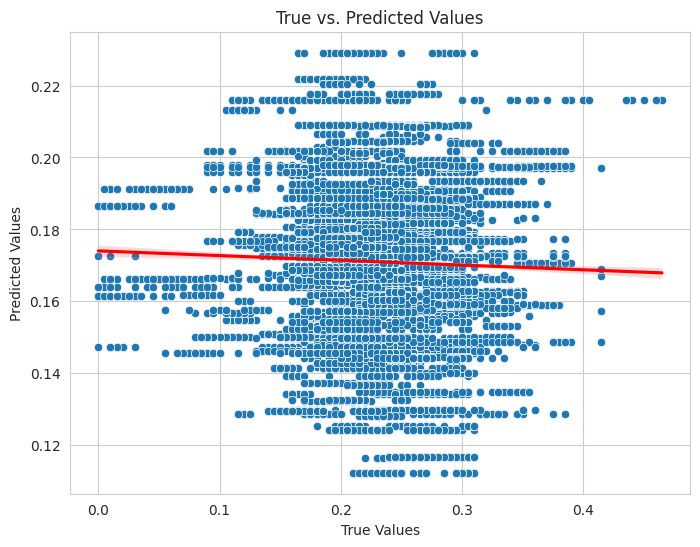

In [36]:
import seaborn as sns

# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=test_y.flatten(), y=predicted_values.flatten())

# Add labels and a title
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")

# Add a regression line for reference
sns.regplot(x=test_y.flatten(), y=predicted_values.flatten(), scatter=False, color='r')

# Show the plot
plt.show()